**Final Project Computational Analyses**

This notebook combines multiple analyses, including ones done by peers. There will be some differences with redundancies and different variable names removed so that the code is readable and functions in one notebook. There are also markdown cells to document which section is which. Since we don't have github, the most obvious difference will be the bottom section with indivisual examples for sentiment analysis.

**Top 10 Sources**

Imports critical libaries and csv files. Adjust the relative filepath for the csv's to where your device has stored them to verify results. 

Finds the top 10 news sources being shared in /r/politics and /r/ukpolitics. Also displays a visualization(lacking the non-default axes labels).

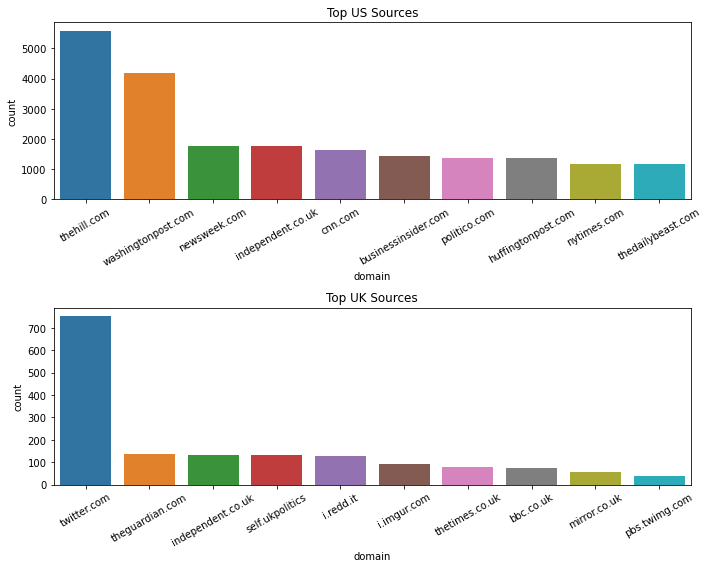

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reads in csv files and processes the top 10 domains for the us politics subreddit.

us_df = pd.read_csv('data/r_politics.csv', parse_dates=['date'])
us_df.head()

us_df.nunique()

# finds the top US news sources
top_us_sources = pd.DataFrame(us_df['domain'].value_counts()[:10])
top_us_sources = top_us_sources.rename(columns = {'domain':'count'}).reset_index()
top_us_sources = top_us_sources.rename(columns = {'index':'domain'})
top_us_sources

# Reads in csv files and processes the top 10 domains for the uk politics subreddit.

uk_df = pd.read_csv('data/r_ukpolitics.csv', parse_dates=['date'])
uk_df.head()

uk_df.nunique()

top_uk_sources = pd.DataFrame(uk_df['domain'].value_counts()[:10])
top_uk_sources = top_uk_sources.rename(columns = {'domain':'count'}).reset_index()
top_uk_sources = top_uk_sources.rename(columns = {'index':'domain'})
top_uk_sources

##It is interesting to note that some of the most popular domains shared are from reddit, imgur which is an image hosting website and links to their own subreddit as well as twitter.

## Visualizing the Sources

fig = plt.figure(1, figsize = (10, 8))

plt.subplot(211)
ax1 = sns.barplot(data = top_us_sources, x = 'domain', y = 'count')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
plt.title('Top US Sources')

plt.subplot(212)
ax2 = sns.barplot(data = top_uk_sources, x = 'domain', y = 'count')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 30)
plt.title('Top UK Sources')

fig.tight_layout()
plt.savefig("top10.png")
plt.show()


**Topic Distributions**

Trains a topic model to create 10 topics based on posts on the US and UK political subreddits, respectively. Since topic models have noise, the results will vary from those displayed in the written analysis.

First displays each topic, with their related terms below.
Then displays the top 5 most relevant articles for each topic, and displays probabilities and titles in a formatted manner. Mallet does preprocessing - using other methods of analysis will require processing such as removing stopwords.

In [2]:
import little_mallet_wrapper
from pathlib import Path

training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in us_df['title']]

original_titles = [title for title in us_df['title']]
original_links = [link for link in us_df['domain']]

num_topics = 10

path_to_mallet = '/home/jovyan/course_materials/mallet/bin/mallet'

#No need to change anything below here
training_data = training_data

#Set output directory
output_directory_path = 'topic-model-output/'

#Create output directory
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

#Create output files
path_to_training_data       	= f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model               	= f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys          	= f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions 	= f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"


little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                          	output_directory_path,
                                          	num_topics,
                                          	training_data)

topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)


for number, topic in enumerate(topics):
    print(f"✨Topic {number}✨\n\n{topic}\n")


topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

from IPython.display import Markdown, display
import re

def make_md(string):
    ## transforms string data into Markdown so it can be nicely formatted with bolding and emojis
    
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):
    
    ## shows the top documents for a given set of topic distributions and a specific topic number

    
    sorted_data = sorted([(_distribution[topic_index], _document) for _distribution, _document in zip(topic_distributions, docs)], reverse=True)
    topic_words = topics[topic_index]
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")
    
    for probability, doc in sorted_data[:n]:
    # Make topic words bolded
        for word in topic_words:
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

# Run the 2 lines below, increasing index by 1 until all topics have been covered
get_top_docs(original_titles, topic_distributions, topic_index=0, n=5)
get_top_docs(original_links, topic_distributions, topic_index=0, n=5)



Importing data...
Complete
Training topic model...
Complete
✨Topic 0✨

['trump', 'gop', 'republican', 'paul', 'impeachment', 'says', 'rep', 'calls', 'ryan', 'mcconnell', 'john', 'senator', 'republicans', 'sen', 'graham', 'house', 'pelosi', 'congress', 'president', 'mitch']

✨Topic 1✨

['trump', 'white', 'house', 'donald', 'says', 'putin', 'president', 'obama', 'military', 'national', 'security', 'north', 'bannon', 'press', 'war', 'korea', 'john', 'climate', 'syria', 'calls']

✨Topic 2✨

['trump', 'russia', 'mueller', 'report', 'house', 'fbi', 'says', 'russian', 'investigation', 'probe', 'white', 'comey', 'lawyer', 'campaign', 'michael', 'clinton', 'election', 'cohen', 'former', 'manafort']

✨Topic 3✨

['trump', 'police', 'gun', 'border', 'shooting', 'children', 'net', 'man', 'ice', 'neutrality', 'school', 'people', 'protesters', 'year', 'fcc', 'says', 'nra', 'right', 'black', 'texas']

✨Topic 4✨

['tax', 'health', 'bill', 'care', 'plan', 'gop', 'warren', 'would', 'sanders', 'trump', 'o

### ✨Topic 0✨

['trump', 'gop', 'republican', 'paul', 'impeachment', 'says', 'rep', 'calls', 'ryan', 'mcconnell', 'john', 'senator', 'republicans', 'sen', 'graham', 'house', 'pelosi', 'congress', 'president', 'mitch']

---

✨  
**Topic Probability**: 0.9246805308503134  
**Document**: GOP Rep. Jason Spencer Rejects Calls to ‘Resign Immediately’ Following Sacha Baron Cohen Prank



✨  
**Topic Probability**: 0.9246805308503134  
**Document**: A hero’s dying wish: Mitch McConnell must bring the 9/11 Victim Compensation Fund bill to a Senate vote



✨  
**Topic Probability**: 0.9189509182266948  
**Document**: Republican Joe Walsh implores congressional GOP to support Trump **impeachment**: 'Put country over party'



✨  
**Topic Probability**: 0.9189509182266948  
**Document**: Photo Op -- Paul Ryan goes to soup kitchen,  puts on apron, &amp; washes dishes that had already been washed



✨  
**Topic Probability**: 0.9189509182266948  
**Document**: Pelosi **says** ‘cowardly’ McCarthy has made GOP the QAnon party over Marjorie Taylor Greene scandal



### ✨Topic 0✨

['trump', 'gop', 'republican', 'paul', 'impeachment', 'says', 'rep', 'calls', 'ryan', 'mcconnell', 'john', 'senator', 'republicans', 'sen', 'graham', 'house', 'pelosi', 'congress', 'president', 'mitch']

---

✨  
**Topic Probability**: 0.9246805308503134  
**Document**: thedailybeast.com



✨  
**Topic Probability**: 0.9246805308503134  
**Document**: nydailynews.com



✨  
**Topic Probability**: 0.9189509182266948  
**Document**: newsweek.com



✨  
**Topic Probability**: 0.9189509182266948  
**Document**: independent.co.uk



✨  
**Topic Probability**: 0.9189509182266948  
**Document**: independent.co.uk



In [3]:
#top UK news sources

uk_df.groupby(['domain']).size()
domains=uk_df.groupby(['domain']).size()
domains.sort_values(ascending=False)[:10]

#process reddit post and title

training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in uk_df['title']]

original_titles = [title for title in uk_df['title']]
original_links = [link for link in uk_df['domain']]

#train topic model

little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                              output_directory_path,
                                              num_topics,
                                              training_data)

#Display topic and top words

topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)
topics

topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for number, topic in enumerate(topics):
    print(f"✨Topic {number}✨\n\n{topic}\n")
    
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

#identify and label 10 topics for each topic index and n
get_top_docs(original_titles, topic_distributions, topic_index=0, n=10)

get_top_docs(original_links, topic_distributions, topic_index=0, n=10)


Importing data...
Complete
Training topic model...
Complete
✨Topic 0✨

['party', 'election', 'conservative', 'tory', 'labour', 'ukip', 'lib', 'bbc', 'general', 'voting', 'group', 'via', 'mps', 'dems', 'tories', 'candidate', 'conservatives', 'liberal', 'lab', 'news']

✨Topic 1✨

['private', 'eye', 'government', 'gove', 'ireland', 'michael', 'porn', 'yellowhammer', 'sex', 'northern', 'security', 'inquiry', 'child', 'block', 'one', 'support', 'found', 'life', 'ban', 'secretary']

✨Topic 2✨

['david', 'today', 'right', 'day', 'mogg', 'rees', 'davis', 'jacob', 'left', 'twitter', 'andrew', 'cameron', 'fox', 'far', 'robinson', 'miliband', 'tommy', 'british', 'pro', 'george']

✨Topic 3✨

['trump', 'london', 'donald', 'mail', 'daily', 'man', 'like', 'president', 'state', 'twitter', 'visit', 'must', 'see', 'attack', 'britain', 'mayor', 'shows', 'front', 'account', 'get']

✨Topic 4✨

['cannabis', 'police', 'use', 'home', 'saudi', 'rudd', 'crime', 'amber', 'trade', 'drug', 'says', 'arabia', 'arms'

### ✨Topic 0✨

['party', 'election', 'conservative', 'tory', 'labour', 'ukip', 'lib', 'bbc', 'general', 'voting', 'group', 'via', 'mps', 'dems', 'tories', 'candidate', 'conservatives', 'liberal', 'lab', 'news']

---

✨  
**Topic Probability**: 0.9190702098118089  
**Document**: BREAKING Nick Boles resigns from the Conservative Party 'I accept I have failed. I have failed chiefly because my **party** has failed to compromise 'I regret that I have therefore resigned from this **party**'



✨  
**Topic Probability**: 0.9093478999297355  
**Document**: BREAKING - Three MPs resign from the Conservative Party to join The Independent Group, Sarah Wollaston, Heidi Allen, Anna Soubry



✨  
**Topic Probability**: 0.8894218270803184  
**Document**: Westminster **voting** intention: LAB: 27% (-6) BREX: 20% (+6) CON: 19% (-4) LDEM: 14% (+7) CHUK: 7% (-2) GRN: 5% (+2) UKIP: 3% (-2) **via** @ComRes



✨  
**Topic Probability**: 0.884092318103668  
**Document**: Newsnight is reporting that Anna Soubry, Heidi Allen and Dr Sarah Woolaston are expected to resign the Conservative Party Whip tomorrow. The Independent Group and Tory Whips are not denying these reports



✨  
**Topic Probability**: 0.8806792696806709  
**Document**: Westminster **voting** intention: CON: 41% (+1) LAB: 40% (+1) LDEM: 8% (-) UKIP: 2% (-3) GRN: 2% (-) (**via** @Survation / 06 - 07 Jun)



✨  
**Topic Probability**: 0.8806792696806709  
**Document**: Conservative Party 'cheated' **election** laws to win seats in General Election, whistleblowers claim



✨  
**Topic Probability**: 0.8704356203595809  
**Document**: Westminster **voting** intention: CON: 40% (-6) LAB: 39% (+5) LDEM: 8% (-) UKIP: 5% (+2) (**via** @Survation / 03 Jun)



✨  
**Topic Probability**: 0.8582679673806525  
**Document**: Westminster **voting** intention: CON: 30% (-1) LAB: 29% (+2) LDEM: 17% (-3) BREX: 13% (-) GRN: 4% (+1) [ComRes, 06/09-08-09]



✨  
**Topic Probability**: 0.8582679673806525  
**Document**: Ukip faces local **election** wipeout after losing every seat it held



✨  
**Topic Probability**: 0.8582679673806525  
**Document**: Brecon &amp; Radnorshire, result: LDEM: 43.5% (+14.3) CON: 39.0% (-9.6) BREX: 10.5% (+10.5) LAB: 5.3% (-12.5) MRLP: 1.0% (+1.0) UKIP: 0.8% (-0.6)



### ✨Topic 0✨

['party', 'election', 'conservative', 'tory', 'labour', 'ukip', 'lib', 'bbc', 'general', 'voting', 'group', 'via', 'mps', 'dems', 'tories', 'candidate', 'conservatives', 'liberal', 'lab', 'news']

---

✨  
**Topic Probability**: 0.9190702098118089  
**Document**: twitter.com



✨  
**Topic Probability**: 0.9093478999297355  
**Document**: twitter.com



✨  
**Topic Probability**: 0.8894218270803184  
**Document**: twitter.com



✨  
**Topic Probability**: 0.884092318103668  
**Document**: twitter.com



✨  
**Topic Probability**: 0.8806792696806709  
**Document**: twitter.com



✨  
**Topic Probability**: 0.8806792696806709  
**Document**: independent.co.uk



✨  
**Topic Probability**: 0.8704356203595809  
**Document**: twitter.com



✨  
**Topic Probability**: 0.8582679673806525  
**Document**: twitter.com



✨  
**Topic Probability**: 0.8582679673806525  
**Document**: twitter.com



✨  
**Topic Probability**: 0.8582679673806525  
**Document**: theguardian.com



**Word Shift Graph - Proportion of Words**

Defines a stopword list, and tokenizes the words for each post. Then creates a wordshift graph that indicates the frequency at which a word appears.

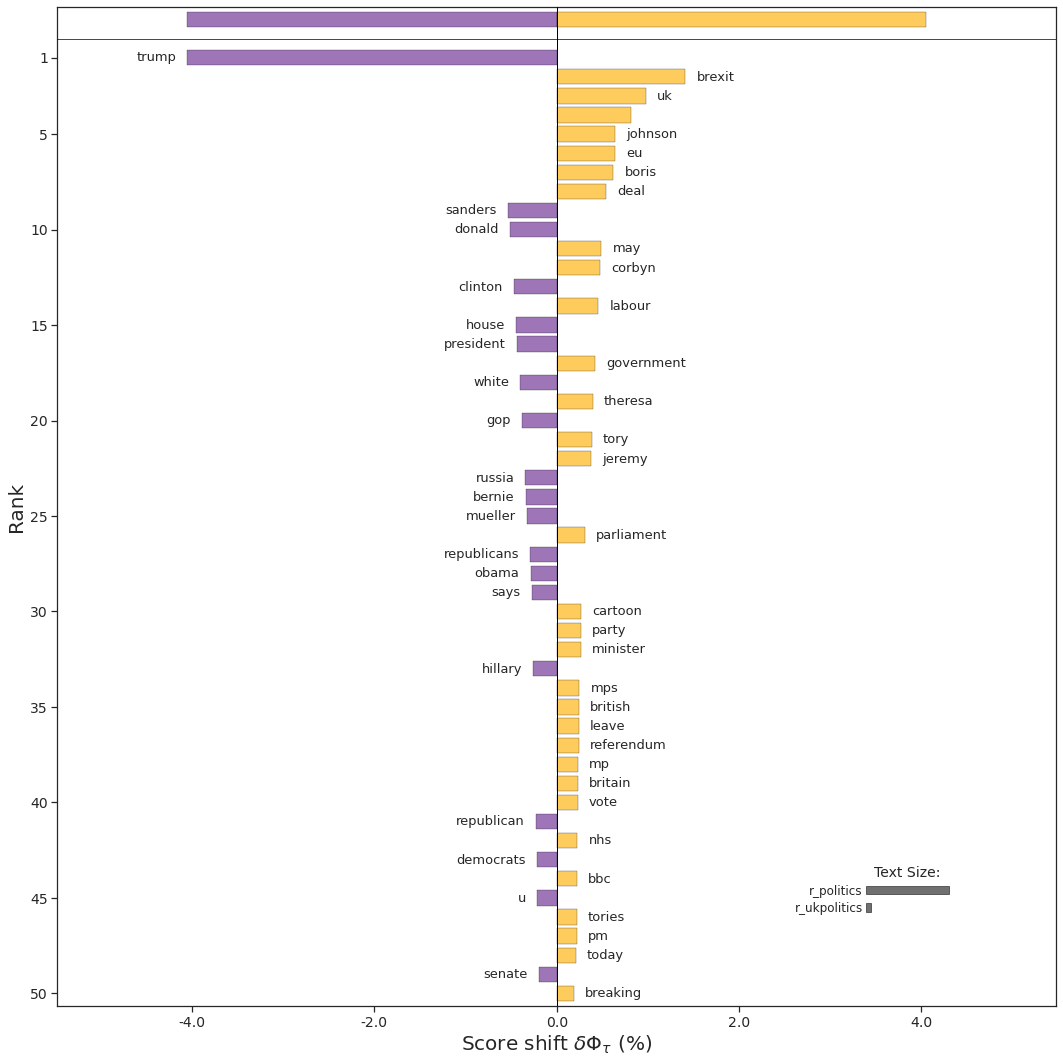

<AxesSubplot:xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [47]:
#update counter
from collections import Counter
!pip install shifterator
import shifterator as sh
import warnings
import re

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 've', 'll', 'amp']

#removes stopwords and standardizes casing

def tokenize_words(text):
    lowercase_text = text.lower()
    split_words = re.split("\W+", lowercase_text)
    meaningful_words =[word for word in split_words if word not in stopwords]
    return meaningful_words


#series to list
us_df['title'].to_list()
r_politics_posts = us_df['title'].to_list()
uk_df['title'].to_list()
r_ukpolitics_posts = uk_df['title'].to_list()


r_politics_counts = Counter()

#tokenize the words for each post and assign the resulting words to counts.  
for post in r_politics_posts:
    words = tokenize_words(post)
    r_politics_counts.update(words)
    
r_ukpolitics_counts = Counter()

for post in r_ukpolitics_posts:
    words = tokenize_words(post)
    r_ukpolitics_counts.update(words)
    
#word shift graph

warnings.filterwarnings("ignore")

proportion_shift = sh.ProportionShift(type2freq_1 = r_politics_counts,
                                        type2freq_2= r_ukpolitics_counts)

proportion_shift.get_shift_graph(system_names = ['r_politics', 'r_ukpolitics'],  width=15, height=15, cumulative_inset=False,  top_n = 50)


**Displaying top examples**

Displays posts that contain the word trump, the most frequent example shown in the wordshift graph for the US.
Displays posts that contain the word brexit, the most frequent example shown in the wordshift graph for the UK.
Both queries are case insensitive.

In [12]:
#certain words that show in r_politics
word_filter = us_df['title'].str.contains('trump', case=False)
us_df[word_filter]


,title,domain,score,date
3,Cruz pins debt crisis on Democrats’ ‘trillions...,dallasnews.com,2385,2021-10-06 01:01:26+00:00
15,Steve Bannon pledges 20k ‘shock troops’ ready ...,independent.co.uk,17194,2021-10-05 12:32:51+00:00
18,"Biden is appointing judges faster than Trump, ...",brookings.edu,27770,2021-10-05 11:00:10+00:00
21,Criminal inquiry into Trump’s Georgia election...,theguardian.com,3223,2021-10-05 09:19:20+00:00
22,A former Pence adviser said Trump had 4 years ...,businessinsider.com,2003,2021-08-21 12:53:18+00:00
...,...,...,...,...
52578,Obama Is Asked What Donald Trump Has Against H...,thedailydolt.com,3646,2012-10-25 11:35:38+00:00
52579,Steven Colbert makes $1 million dollar charity...,americanlivewire.com,2813,2012-10-25 08:22:11+00:00
53571,Obama says no to Plan B for teens: Once again...,politics.salon.com,2227,2011-12-07 23:56:02+00:00
53786,Obama destroys Trump at the Correspondents' Di...,youtube.com,3389,2011-05-01 03:30:07+00:00


In [13]:
#certain words that show in r_ukpolitics
word_filter = uk_df['title'].str.contains('brexit', case=False)
uk_df[word_filter]

,title,domain,score,date
39,Independence would hit Scottish economy harder...,scotsman.com,875,2021-02-03 07:25:06+00:00
42,Beekeeper in Brexit row with government over t...,itv.com,880,2021-02-02 09:48:24+00:00
55,Brexiteers vanish as Brexit dawn looms,thetimes.co.uk,1321,2020-11-16 16:44:22+00:00
61,Tory MP Bernard Jenkin blasted for 'delusional...,thenational.scot,1030,2020-09-13 08:40:54+00:00
68,UK government rejects call for inquiry into po...,independent.co.uk,938,2020-07-21 10:59:29+00:00
...,...,...,...,...
2118,Thes Times on Brexit starting,feeds.thetimes.co.uk,1180,2017-02-09 07:56:47+00:00
2157,"'There is no plan' for Brexit, leaked memo says",bbc.co.uk,607,2016-11-15 05:44:02+00:00
2181,UK scientists dropped from EU projects because...,theguardian.com,699,2016-07-12 07:42:43+00:00
2188,New Zealand offers UK its top trade negotiator...,telegraph.co.uk,603,2016-06-29 16:53:39+00:00


**Sentiment based wordshift graph**

Creates a wordshift graph indicating the sentiment behind popular terms.

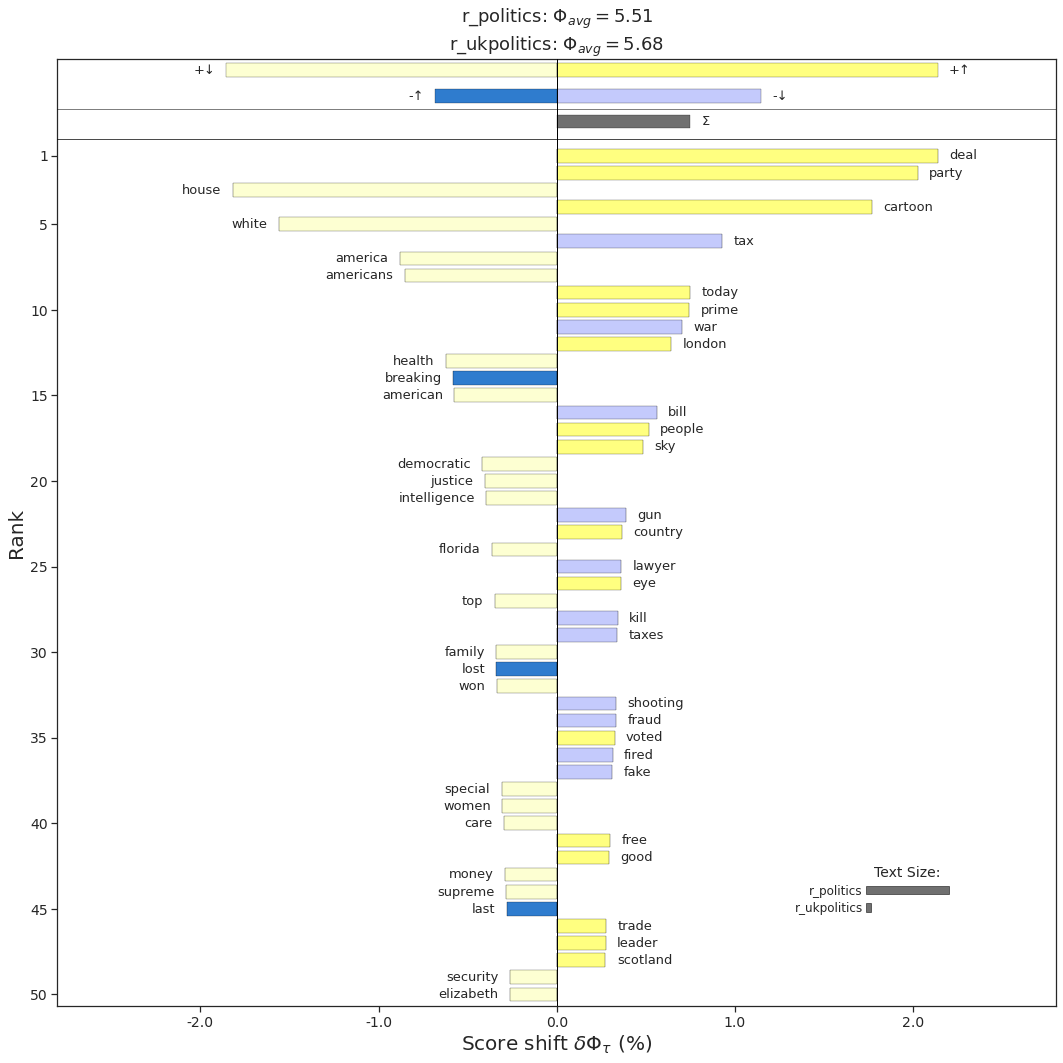

In [6]:
#wordshift graph sentiment analysis

sentiment_shift = sh.WeightedAvgShift(type2freq_1 = r_politics_counts,
                                type2freq_2= r_ukpolitics_counts,
                                type2score_1='labMT_English',
                                stop_lens=[(4,6)]
                                )

sentiment_shift.get_shift_graph(system_names = ['r_politics', 'r_ukpolitics'],  width=15, height=15, cumulative_inset=False, top_n =50)

    
# Displays the visualization
    
proportion_shift = sh.ProportionShift(type2freq_1 = r_politics_counts,
                                        type2freq_2= r_ukpolitics_counts)



**Sentiment Examples**
Dives into the articles that are most influential for sentiment(read: containing the term: deal) for the UK and US. Also counts the amount of titles. Uses a stricter query type than the frequency wordshift graph, as the type of "deal" string matters greatly, and dataframe displays only parts of titles. The objective of this is to verify the sentiment shown by the graph - ultimately, the results making sense depends on the ability to read the graph - thank the writing analysis for the legend!


In [55]:
#ukpolitics query
uk_count = 0
for title in uk_df['title']:
    if "deal" in title.split():
        print(title)
        uk_count += 1
    
print(uk_count)
    

Japan trade deal commits UK to stricter state aid curbs than in EU talks
These MPs just voted against protecting the NHS from a post-Brexit trade deal
JeremyCorbyn: Boris Johnson has spent months promising we'd leave the EU today. The failure to do so is his and his alone. Labour will get Brexit sorted by giving the people the final say within six months with the choice of a credible leave deal or remain. And we'll carry out what you decide.
Boris Johnson's Brexit deal 'would cost UK economy £70bn'
Prof John Curtice’s election prediction: Election will return more than a 100 MPs not from Labour or Conservatives. And whilst Corbyn can do a deal with another party to stop Brexit, Johnson cannot to do a deal to deliver Brexit.
Nearly half of UK think Boris Johnson is lying about protecting NHS from Trump trade deal
'I've not read the bill, but I'm voting for it' - Labour MP Jim Fitzpatrick says he hasn't read any pages of the bill, but will vote for the deal in Parliament.
Keir Starmer co

In [56]:
#US politics query
us_count = 0
for title in us_df['title']:
    if "deal" in title.split():
         print(title)
         us_count += 1
    
print(us_count)

Marjorie Taylor Greene ovation shows why Biden and Democrats shouldn't deal with GOP
Pelosi "absolutely" would skip August recess to reach coronavirus stimulus deal
Trump administration accused of creating a 'secret police' force to deal with protests
Jeffrey Epstein accuser Courtney Wild asks AG Barr to tear up immunity deal
Trump: G7 Con and Obama’s Netflix Deal Are the Same Thing - The president thinks accepting millions from foreign governments is the same as signing a deal with a movie studio once leaving office.
Trump's 'great for everybody' ceasefire deal in Syria gives Turkey everything it wants in exchange for virtually nothing
Donald Trump cuts a deal with himself, virtually guaranteeing impeachment
House Democrats: It's time to include Trump's shady Syria/Turkey deal in impeachment inquiry
Trump asked Tillerson to help broker deal to end US prosecution of Turkish trader represented by Giuliani
Trump touts 'great' Chinese trade deal that doesn't actually exist
Trump and Erdog